<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/10.1-Access_Statevector_Simulator_Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/ecosystem/aer/tutorials/1_aer_provider.html

## Use Aer simulators
These are high performance simulators

In [3]:
from qiskit import Aer

backends = Aer.backends()
for b in backends:
  print(b)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


### aer_simulator
This is the main simulator in Aer - it simulates the quantum computer hardware

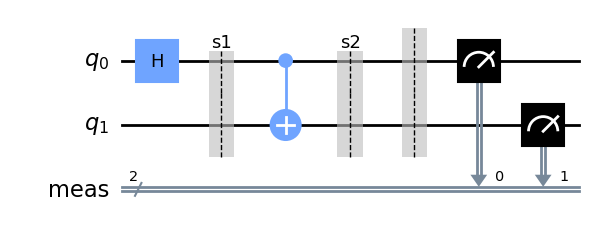

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [18]:
from qiskit import Aer, QuantumCircuit
import qiskit.visualization as vi
import qiskit.quantum_info as qi

qc = QuantumCircuit(2)
qc.h(0)
qc.save_statevector("s1")
qc.cx(0,1)
qc.save_statevector("s2")
qc.measure_all()
display(qc.draw())

simulator = Aer.get_backend("aer_simulator")
result = simulator.run(qc, shots=1).result()

s1 = result.data()["s1"]
s2 = result.data()["s2"]
display(s1.draw("latex", prefix="s1="))
display(s2.draw("latex", prefix="s2="))

### Using the statevector_simulator (or aer_simulator_statevector)

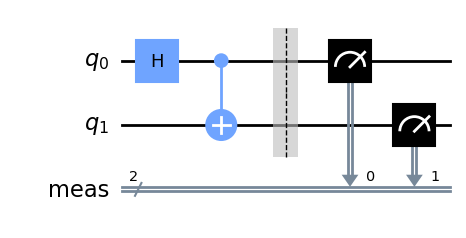

{'counts': {'0x0': 1}, 'memory': ['0x0']}


KeyError: ignored

In [ ]:
from qiskit import Aer, QuantumCircuit
import qiskit.visualization as vi

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
display(qc.draw())

simulator = Aer.get_backend("statevector_simulator")
simulator = Aer.get_backend("aer_simulator_statevector")
result = simulator.run(qc, shots=1, memory=True).result()

print(result.data())
vi.array_to_latex(result.data()["statevector"])